In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Integrated line/20250806_142807.csv')

/tmp/ipython-input-614913806.py:1: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Integrated line/20250806_142807.csv')


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98100 entries, 0 to 98099
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   batch_id                    98100 non-null  int64  
 1   batch_start_time            98100 non-null  object 
 2   batch_stop_time             38641 non-null  object 
 3   model_no                    98100 non-null  object 
 4   recipe_name                 98100 non-null  object 
 5   barcode                     98100 non-null  object 
 6   vendor                      98100 non-null  object 
 7   received_time               98100 non-null  object 
 8   pole_number                 98100 non-null  object 
 9   result_nib_num              98100 non-null  object 
 10  result_trip_time            98100 non-null  float64
 11  result_current              98100 non-null  float64
 12  result_amb_temp             98100 non-null  float64
 13  result_line_num             981

In [ ]:
df

Data cleaning

In [3]:
df.columns= (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('.', '')
)

Removing outliers using z-score method

In [4]:
upper_limits = df['result_trip_time'].mean() + 3 * df['result_trip_time'].std()
lower_limits = df['result_trip_time'].mean() - 3 * df['result_trip_time'].std()

In [5]:
df.loc[(df['result_trip_time'] > upper_limits) | (df['result_trip_time'] < lower_limits)]

,batch_id,batch_start_time,batch_stop_time,model_no,recipe_name,barcode,vendor,received_time,pole_number,result_nib_num,...,recipecurrent_(28>tmp>32_),recipecurrent_(32>tmp>36_),recipecurrent_(36>tmp>40_),recipecurrent_(40>tmp>44_),recipecurrent_44>tmp>48_),recipecurrent_(48>tmp>52_),recipecurrent_(tmp>52),recipefresh_mcb_turns,reciperework_mcb_turns,mode
83,20250731061828,2025-07-31 06:18:28,2025-08-04 15:02:52,-32-C,BA10320C,BA10320CGYJ086790,J,2025-08-01 06:32:24,1900-01-01 00:00:00,1D-6,...,84.9,84.9,84.9,84.1,84.1,84.1,84.1,83.2,2.5,0
200,20250731061828,2025-07-31 06:18:28,2025-08-04 15:02:52,-32-C,BA10320C,BA10320CGYR004321,R,2025-08-01 06:38:34,1900-01-01 00:00:00,2D-3,...,84.9,84.9,84.9,84.1,84.1,84.1,84.1,83.2,2.5,0
211,20250731061828,2025-07-31 06:18:28,2025-08-04 15:02:52,-32-C,BA10320C,BA10320CGYR010926,R,2025-08-01 06:38:34,1900-01-01 00:00:00,2B-2,...,84.9,84.9,84.9,84.1,84.1,84.1,84.1,83.2,2.5,0
429,20250731061828,2025-07-31 06:18:28,2025-08-04 15:02:52,-32-C,BA10320C,BA10320CGYS169266,S,2025-08-01 06:59:07,1900-01-01 00:00:00,2B-4,...,84.9,84.9,84.9,84.1,84.1,84.1,84.1,83.2,2.5,0
565,20250731061828,2025-07-31 06:18:28,2025-08-04 15:02:52,-32-C,BA10320C,BA10320CGYJ097276,J,2025-08-01 07:03:13,1900-01-01 00:00:00,2C-2,...,84.9,84.9,84.9,84.1,84.1,84.1,84.1,83.2,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97904,20250804150253,04-08-2025,NaN,-32-C,BA10320C,BA10320CHYS051987,S,2025-08-06 14:24:08,1,1B-3,...,84.9,84.9,84.9,84.1,84.1,84.1,84.1,83.2,2.5,0
97930,20250804150253,04-08-2025,NaN,-32-C,BA10320C,BA10320CHYJ010550,J,2025-08-06 14:24:31,1,2B-5,...,84.9,84.9,84.9,84.1,84.1,84.1,84.1,83.2,2.5,0
97974,20250804150253,04-08-2025,NaN,-32-C,BA10320C,BA10320CHYS002910,S,2025-08-06 14:25:19,1,2B-1,...,84.9,84.9,84.9,84.1,84.1,84.1,84.1,83.2,2.5,0
98078,20250804150253,04-08-2025,NaN,-32-C,BA10320C,BA10320CHYS033738,S,2025-08-06 14:27:15,1,1A-3,...,84.9,84.9,84.9,84.1,84.1,84.1,84.1,83.2,2.5,0


Trimming

In [6]:
new_data = df.loc[(df['result_trip_time'] < upper_limits) & (df['result_trip_time'] > lower_limits)]

In [7]:
print('outliers= ', len(df) - len(new_data))

outliers=  985


In [8]:
new_data = new_data[['batch_id', 'recipe_name', 'barcode', 'vendor', 'received_time', 'pole_number', 'result_trip_time', 'result_current', 'result_amb_temp', 'result_line_num', 'resultfinal_sts', 'result_reason', 'operator_name']]

In [9]:
new_data

,batch_id,recipe_name,barcode,vendor,received_time,pole_number,result_trip_time,result_current,result_amb_temp,result_line_num,resultfinal_sts,result_reason,operator_name
0,20250731061828,BA10320C,BA10320CGYR014835,R,2025-08-01 06:31:25,1900-01-01 00:00:00,25.2,82.570000,29.7,2,PASS,NaN,Opr12
1,20250731061828,BA10320C,BA10320CGYR009649,R,2025-08-01 06:31:25,1900-01-01 00:00:00,18.4,82.570000,29.7,2,PASS,NaN,Opr12
2,20250731061828,BA10320C,BA10320CGYR008523,R,2025-08-01 06:31:25,1900-01-01 00:00:00,13.0,82.570000,29.7,2,FAIL,ET,Opr12
3,20250731061828,BA10320C,BA10320CGYJ106964,J,2025-08-01 06:31:25,1900-01-01 00:00:00,22.1,82.570000,29.7,2,PASS,NaN,Opr12
4,20250731061828,BA10320C,BA10320CGYJ106970,J,2025-08-01 06:31:25,1900-01-01 00:00:00,23.1,82.570000,29.7,2,PASS,NaN,Opr12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98095,20250804150253,BA10320C,BA10320CHYJ006033,J,2025-08-06 14:27:15,1,21.8,81.629997,29.2,1,PASS,NaN,Opr3
98096,20250804150253,BA10320C,BA10320CHYS059015,S,2025-08-06 14:27:15,1,20.3,81.629997,29.2,1,PASS,NaN,Opr3
98097,20250804150253,BA10320C,BA10320CHYS059014,S,2025-08-06 14:27:15,1,21.9,81.629997,29.2,1,PASS,NaN,Opr3
98098,20250804150253,BA10320C,BA10320CHYS059011,S,2025-08-06 14:27:15,1,14.6,81.629997,29.2,1,FAIL,ET,Opr3


In [10]:
(new_data[['batch_id', 'recipe_name']]).value_counts()

,,count
batch_id,recipe_name,
20250804150253,BA10320C,58901
20250731061828,BA10320C,38214


In [11]:
new_data = new_data[new_data['batch_id']== 20250804150253]

In [12]:
new_data = new_data[new_data['pole_number']!= '1900-01-01 00:00:00']

In [13]:
new_data

,batch_id,recipe_name,barcode,vendor,received_time,pole_number,result_trip_time,result_current,result_amb_temp,result_line_num,resultfinal_sts,result_reason,operator_name
65534,20250804150253,BA10320C,BA10320CHYS039373,S,2025-08-05 13:09:40,1,18.9,81.629997,30.5,1,PASS,NaN,Opr4
65535,20250804150253,BA10320C,BA10320CHYS039380,S,2025-08-05 13:09:40,1,25.8,81.629997,30.5,1,PASS,NaN,Opr4
65536,20250804150253,BA10320C,BA10320CHYS039379,S,2025-08-05 13:09:40,1,22.5,81.629997,30.5,1,PASS,NaN,Opr4
65537,20250804150253,BA10320C,BA10320CHYS039386,S,2025-08-05 13:09:40,1,21.5,81.629997,30.5,1,PASS,NaN,Opr4
65538,20250804150253,BA10320C,BA10320CHYS039378,S,2025-08-05 13:09:40,1,23.4,81.629997,30.5,1,PASS,NaN,Opr4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98095,20250804150253,BA10320C,BA10320CHYJ006033,J,2025-08-06 14:27:15,1,21.8,81.629997,29.2,1,PASS,NaN,Opr3
98096,20250804150253,BA10320C,BA10320CHYS059015,S,2025-08-06 14:27:15,1,20.3,81.629997,29.2,1,PASS,NaN,Opr3
98097,20250804150253,BA10320C,BA10320CHYS059014,S,2025-08-06 14:27:15,1,21.9,81.629997,29.2,1,PASS,NaN,Opr3
98098,20250804150253,BA10320C,BA10320CHYS059011,S,2025-08-06 14:27:15,1,14.6,81.629997,29.2,1,FAIL,ET,Opr3


In [15]:
new_data['barcode_occurence'] = new_data.groupby('barcode').cumcount()

In [16]:
first_occured = new_data[new_data['barcode_occurence']== 0]
first_occured = (first_occured['resultfinal_sts'].value_counts(normalize= True)*100).reset_index()
first_occured

,resultfinal_sts,proportion
0,FAIL,51.577683
1,PASS,48.422317


In [17]:
second_occured = new_data[new_data['barcode_occurence']== 1]
second_occured = (second_occured['resultfinal_sts'].value_counts(normalize= True)*100).reset_index()
second_occured

,resultfinal_sts,proportion
0,PASS,61.530542
1,FAIL,38.469458


In [18]:
third_occured = new_data[new_data['barcode_occurence']== 2]
third_occured = (third_occured['resultfinal_sts'].value_counts(normalize= True)*100).reset_index()
third_occured

,resultfinal_sts,proportion
0,PASS,64.777999
1,FAIL,35.222001


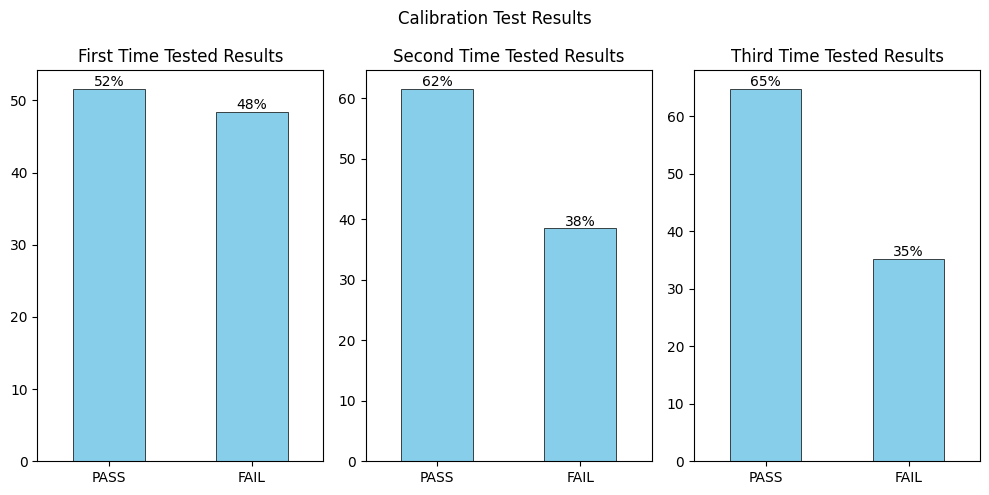

In [19]:
fig1, can1 = plt.subplots(1, 3, figsize=(10, 5))

first_occured.plot(kind='bar', color='skyblue', linewidth=0.5, edgecolor='black', ax=can1[0])
can1[0].set_xticklabels(['PASS', 'FAIL'], rotation=0)
for p in can1[0].patches:
    can1[0].annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')
can1[0].legend().remove()
can1[0].set_title('First Time Tested Results')

second_occured.plot(kind='bar', color='skyblue', linewidth=0.5, edgecolor='black', ax=can1[1])
can1[1].set_xticklabels(['PASS', 'FAIL'], rotation=0)
for p in can1[1].patches:
    can1[1].annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')
can1[1].legend().remove()
can1[1].set_title('Second Time Tested Results')

third_occured.plot(kind='bar', color='skyblue', linewidth=0.5, edgecolor='black', ax=can1[2])
can1[2].set_xticklabels(['PASS', 'FAIL'], rotation=0)
for p in can1[2].patches:
    can1[2].annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')
can1[2].legend().remove()
can1[2].set_title('Third Time Tested Results')

plt.suptitle('Calibration Test Results')
plt.tight_layout()
plt.show()

In [20]:
first_pie = (new_data[new_data['barcode_occurence']== 0]['result_reason'].value_counts(normalize= True)*100).reset_index()

In [21]:
second_pie = (new_data[new_data['barcode_occurence']== 1]['result_reason'].value_counts(normalize= True)*100).reset_index()

In [22]:
third_pie = (new_data[new_data['barcode_occurence']== 2]['result_reason'].value_counts(normalize= True)*100).reset_index()

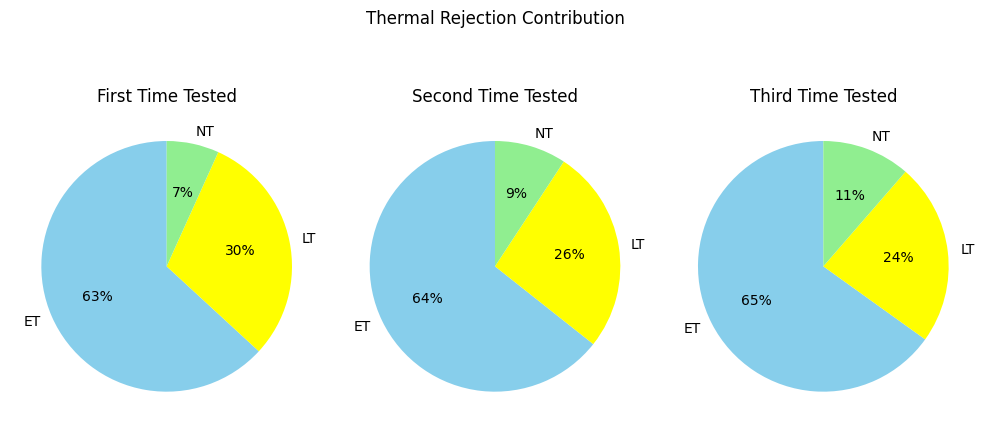

In [23]:
fig2, can2 = plt.subplots(1, 3, figsize=(10, 5))


can2[0].pie(first_pie['proportion'], labels= first_pie['result_reason'], autopct='%.0f%%', startangle=90, colors=['skyblue','yellow', 'lightgreen', 'coral'])
can2[0].set_title('First Time Tested')

can2[1].pie(second_pie['proportion'], labels= second_pie['result_reason'], autopct='%.0f%%', startangle=90, colors=['skyblue','yellow', 'lightgreen', 'coral'])
can2[1].set_title('Second Time Tested')

can2[2].pie(third_pie['proportion'], labels= second_pie['result_reason'], autopct='%.0f%%', startangle=90, colors=['skyblue','yellow', 'lightgreen', 'coral'])
can2[2].set_title('Third Time Tested')

plt.suptitle('Thermal Rejection Contribution')
plt.tight_layout()
plt.show()

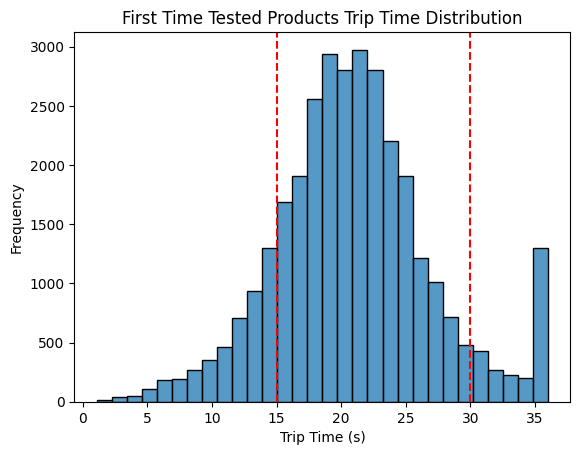

In [24]:
sns.histplot(new_data['result_trip_time'], bins= 30)
plt.title('First Time Tested Products Trip Time Distribution')
plt.xlabel('Trip Time (s)')
plt.ylabel('Frequency')
plt.axvline(x= 15, color= 'r', linestyle= '--')
plt.axvline(x= 30, color= 'r', linestyle= '--')
plt.show()

In [25]:
thermal_parmtr = new_data[['result_current', 'result_amb_temp']].round()
thermal_parmtr['result_amb_temp'].unique()

array([30., 31., 32., 29., 27., 28.])

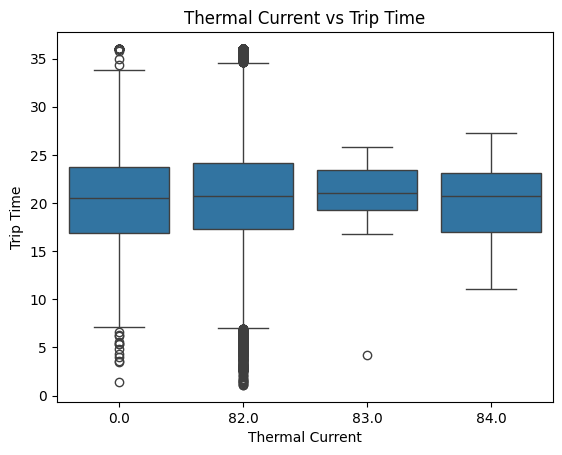

In [26]:
sns.boxplot(x= thermal_parmtr['result_current'],y= new_data['result_trip_time'])
plt.title('Thermal Current vs Trip Time')
plt.xlabel('Thermal Current')
plt.ylabel('Trip Time')
plt.show()

In [44]:
operator_yield = new_data.groupby('operator_name')['resultfinal_sts'].apply(
    lambda x: (x == 'PASS').mean() * 100
).reset_index()
operator_yield['resultfinal_sts'] = operator_yield['resultfinal_sts'].round()

In [45]:
operator_yield

,operator_name,resultfinal_sts
0,Opr1,43.0
1,Opr10,55.0
2,Opr11,46.0
3,Opr12,64.0
4,Opr2,43.0
5,Opr3,39.0
6,Opr4,49.0
7,Opr5,52.0
8,Opr6,67.0
9,Opr7,48.0


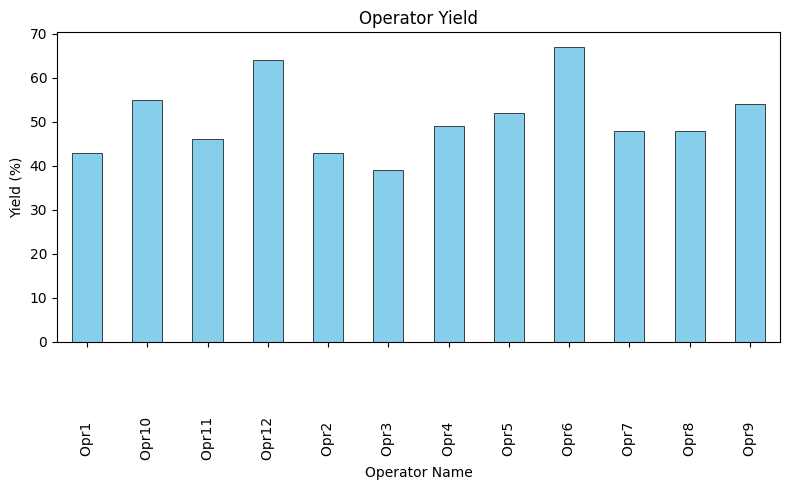

In [57]:
ax = operator_yield.plot(kind='bar', color=['skyblue'], linewidth=0.5, edgecolor='black', figsize=(8,5))
ax.legend().remove()
ax.set_xticklabels(operator_yield['operator_name'], rotation=90)
plt.title('Operator Yield')
plt.xlabel('Operator Name')
plt.ylabel('Yield (%)')
plt.tight_layout()
plt.show()